In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


In [2]:
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.1),
])


In [3]:
dataset_path = 'C:/Users/Jones/OneDrive - UT Arlington/Desktop/jones/Studies/Haridev/New P/PetImages'

image_size = (224, 224)  # Example size, adjust as needed
batch_size = 32  # Or another batch size that fits your memory

train_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'  # set label_mode to 'binary' for binary classification
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary' 
)

Found 192 files belonging to 2 classes.


Using 154 files for training.
Found 192 files belonging to 2 classes.
Using 38 files for validation.


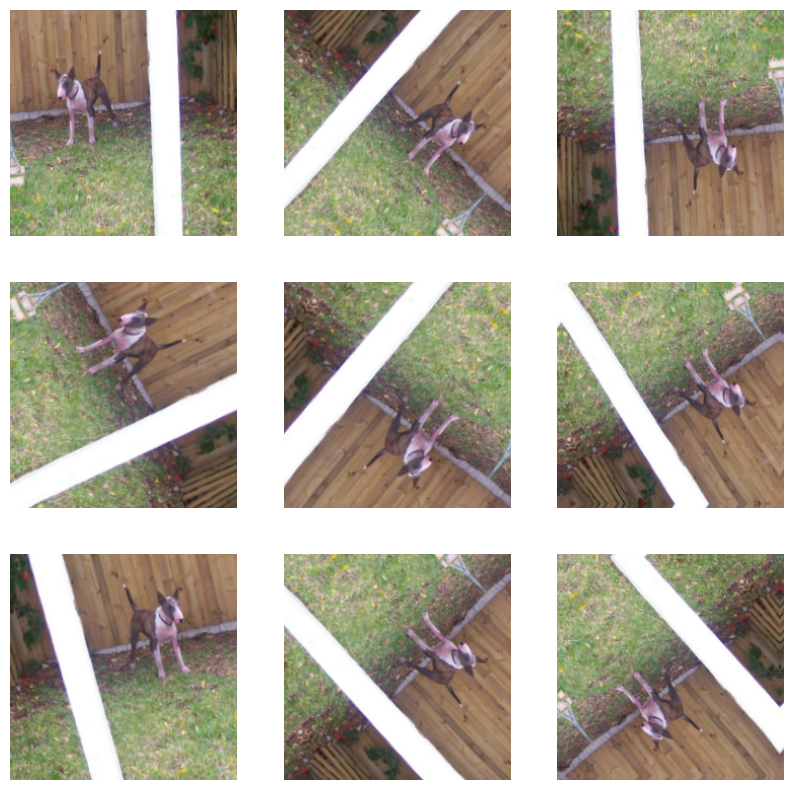

In [4]:
for images, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    # Apply data augmentation to the images and visualize them
    for i in range(9):
        augmented_image = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype('uint8'))
        plt.axis('off')
    break


In [5]:
base_model_path = r"C:\Users\Jones\OneDrive - UT Arlington\Desktop\jones\Studies\Haridev\New P\final_model.keras"
base_model = load_model(base_model_path)

base_model.trainable = False


In [6]:
base_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


In [7]:
def apply_augmentation(image, label):
    image = data_augmentation(image)
    return image, label

augmented_train_ds = train_ds.map(apply_augmentation)


In [8]:
checkpoint = ModelCheckpoint('model_with_augmentation.keras', save_best_only=True, monitor='val_loss')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = base_model.fit(
    augmented_train_ds, 
    epochs=10, 
    validation_data=val_ds, 
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/10


C:\Users\Jones\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8447 - loss: 0.6119 - val_accuracy: 0.9474 - val_loss: 0.3670
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8339 - loss: 0.7984 - val_accuracy: 0.9474 - val_loss: 0.3670
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8183 - loss: 0.8474 - val_accuracy: 0.9474 - val_loss: 0.3670
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8256 - loss: 0.8729 - val_accuracy: 0.9474 - val_loss: 0.3670
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7962 - loss: 0.9093 - val_accuracy: 0.9474 - val_loss: 0.3670
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8395 - loss: 0.6682 - val_accuracy: 0.9474 - val_loss: 0.3670
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8756 - loss: 0.8101 - val_accuracy: 0.9474 - val_loss: 0.3670
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8083 - loss: 0.6825 - val_accuracy: 0.9474 - val_loss: 0.3670
Epoch 9/10
5/5 ━━━━━━━━━━━

In [9]:
base_model.save('model_with_augmentation_final.keras')


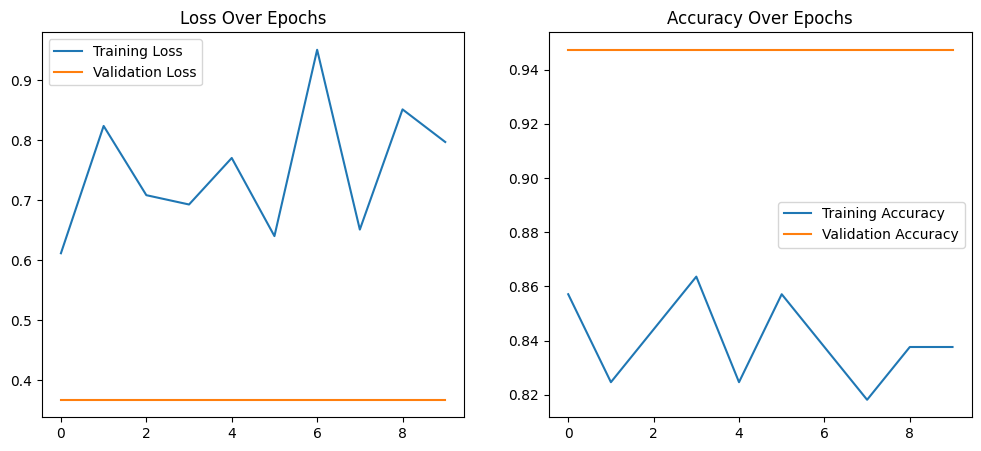

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()
